# 1. Problem Definition

This project is an attempt of Exploratory Data Analysis, as well as to build a machine learning model using a credit risk data set in order to predict the likelihood of a loan default. A lot of information is collected upon application of a loan in order to underwrite the risk a bank faces if they were to approve the loan. Some of these factors, such as default history, or credit history, generally gives the underwriter a clue on what the loan's risk might be however, there are many more factors that could impact this risk and are not as intuitive. Furthermore, in order for banks to maximize their profit margins by discovering lower risk applicants who might have had a default history or a high risk applicant without any credit history, it is imperative that each attribute of an applicant (that positively or negatively correlate to risk) be well scrutinized.

The data set used in this study was taken from https://www.kaggle.com/datasets/laotse/credit-risk-dataset

### Import libraries for data preparation and Exploratory Data Analysis (EDA)

In [1]:
# Importing libraries for data cleaning and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Data Preparation

### Import dataframe from .csv

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


#### Observations

- Attributes are not very intuitively named, best to rename them with proper standardization
- Loan Status feature is binary and categorical, 1 and 0 works well
- Default on file feature is also binary and categorical, but is of object64 type, best to convert to binary system as well (Y = 1, N = 0) for heatmap during EDA
- Not able to tell if there are missing values in dataset from .head(10), subsequent sections will look for missing values and substitute them with sensible values

In [3]:
column_mapping = {
                    "person_age": "Age",
                    "person_income": "Income",
                    "person_home_ownership": "Home_Ownership",
                    "person_emp_length": "Employment_Years",
                    "loan_intent": "Loan_Intention",
                    "loan_grade": "Loan_Grade",
                    "loan_amnt": "Loan_Amount",
                    "loan_int_rate": "Interest_Rate",
                    "loan_status": "Loan_Defaulted",
                    "loan_percent_income": "Loan_Percent_Income",
                    "cb_person_default_on_file": "Default_History",
                    "cb_person_cred_hist_length": "Credit_History_Years",
}

df = df.rename(columns=column_mapping)
df

,Age,Income,Home_Ownership,Employment_Years,Loan_Intention,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Defaulted,Loan_Percent_Income,Default_History,Credit_History_Years
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Create backup for new dataframe

In [4]:
df_renamed = df.copy()
df_renamed

,Age,Income,Home_Ownership,Employment_Years,Loan_Intention,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Defaulted,Loan_Percent_Income,Default_History,Credit_History_Years
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Convert default history values to int64 (1 for Y, 0 for N)

In [5]:
value_mapping = {
                 'Y': 1,
                 'N': 0
}

df_renamed["Default_History"] = df_renamed.Default_History.map(value_mapping)
df_renamed.head(10)

,Age,Income,Home_Ownership,Employment_Years,Loan_Intention,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Defaulted,Loan_Percent_Income,Default_History,Credit_History_Years
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,0,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,0,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,0,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,0,3


### Search for missing values

In [6]:
df_renamed.isna().sum()

Age                        0
Income                     0
Home_Ownership             0
Employment_Years         895
Loan_Intention             0
Loan_Grade                 0
Loan_Amount                0
Interest_Rate           3116
Loan_Defaulted             0
Loan_Percent_Income        0
Default_History            0
Credit_History_Years       0
dtype: int64

#### Observation

- Many missing values
- Employment_Years and Interest_Rate are numerical data, column median will be used to populate missing values

In [7]:
# Create a list of numerical data to iterate through
# integer_columns = df_renamed.select_dtypes(include=['int64','float64']).columns.tolist()

# Use a for loop to look for columns with missing data
# Populate empty values with median
for column in df_renamed:
    if df_renamed[column].isnull().any():
        df_renamed[column]=df_renamed[column].fillna(df[column].median())

### Check if missing values are filled

In [8]:
df_renamed.isna().sum()
df_renamed.info()
df_renamed.sample(10)

Age                     0
Income                  0
Home_Ownership          0
Employment_Years        0
Loan_Intention          0
Loan_Grade              0
Loan_Amount             0
Interest_Rate           0
Loan_Defaulted          0
Loan_Percent_Income     0
Default_History         0
Credit_History_Years    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   32581 non-null  int64  
 1   Income                32581 non-null  int64  
 2   Home_Ownership        32581 non-null  object 
 3   Employment_Years      32581 non-null  float64
 4   Loan_Intention        32581 non-null  object 
 5   Loan_Grade            32581 non-null  object 
 6   Loan_Amount           32581 non-null  int64  
 7   Interest_Rate         32581 non-null  float64
 8   Loan_Defaulted        32581 non-null  int64  
 9   Loan_Percent_Income   32581 non-null  float64
 10  Default_History       32581 non-null  int64  
 11  Credit_History_Years  32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


,Age,Income,Home_Ownership,Employment_Years,Loan_Intention,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Defaulted,Loan_Percent_Income,Default_History,Credit_History_Years
4986,22,42500,RENT,0.0,DEBTCONSOLIDATION,C,5000,12.98,0,0.12,1,4
22956,27,36000,RENT,0.0,DEBTCONSOLIDATION,C,8000,13.92,0,0.22,1,9
28827,31,190000,MORTGAGE,15.0,DEBTCONSOLIDATION,C,24000,10.99,0,0.13,0,6
14329,26,105000,OWN,10.0,HOMEIMPROVEMENT,B,4800,11.71,0,0.05,0,4
27038,27,91800,MORTGAGE,4.0,MEDICAL,D,25000,16.07,1,0.23,0,9
4247,26,48000,RENT,10.0,DEBTCONSOLIDATION,B,4500,11.11,0,0.09,0,4
8141,25,135000,RENT,6.0,HOMEIMPROVEMENT,B,7200,9.91,0,0.05,0,3
4531,23,92000,RENT,5.0,MEDICAL,B,4800,10.00,0,0.05,0,3
2399,25,32000,MORTGAGE,7.0,PERSONAL,B,3250,10.74,1,0.10,0,2
5929,24,28000,RENT,0.0,PERSONAL,D,5600,14.12,1,0.20,1,2


### Create backup for cleaned dataframe

In [9]:
df_cleaned = df_renamed.copy()
df_cleaned.isna().sum()
df_cleaned.sample(10)

Age                     0
Income                  0
Home_Ownership          0
Employment_Years        0
Loan_Intention          0
Loan_Grade              0
Loan_Amount             0
Interest_Rate           0
Loan_Defaulted          0
Loan_Percent_Income     0
Default_History         0
Credit_History_Years    0
dtype: int64

,Age,Income,Home_Ownership,Employment_Years,Loan_Intention,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Defaulted,Loan_Percent_Income,Default_History,Credit_History_Years
17408,24,45000,MORTGAGE,0.0,EDUCATION,C,10625,14.27,1,0.24,0,4
12532,23,54000,RENT,0.0,DEBTCONSOLIDATION,B,12000,12.42,1,0.22,0,2
18447,33,98000,RENT,2.0,EDUCATION,A,20000,6.91,0,0.20,0,5
5301,24,24000,RENT,1.0,PERSONAL,A,8500,7.90,1,0.35,0,3
3101,24,114750,RENT,1.0,MEDICAL,B,3400,12.21,1,0.03,0,4
15572,26,145992,MORTGAGE,0.0,EDUCATION,D,20000,10.99,0,0.14,1,2
31782,42,140400,MORTGAGE,6.0,PERSONAL,B,14000,10.99,0,0.10,0,14
22953,29,60000,MORTGAGE,1.0,PERSONAL,B,5600,12.42,0,0.09,0,10
14135,25,100000,MORTGAGE,9.0,EDUCATION,B,8000,10.25,0,0.08,0,3
20187,35,33000,RENT,0.0,HOMEIMPROVEMENT,E,4000,16.32,1,0.12,0,10


# 3. Exploratory Data Analysis (EDA)

#### Notes:

- Here is where the data is explored, first from a higher level, and eventually going deeper into individual attributes, as well as combining attributes
- The objective here is to look out for possible trends and correlations (both positive and negative) between different customer features and their loan default statuses
- As well as to look out for features that don't necessarily indicate a risk towards loan default, and not consider them in our machine learning model

### Heatmap to get a sense of correlation between each feature

In [10]:
# Copy dataframe for heatmap

df_vis = df_cleaned.copy()

<Figure size 1440x1080 with 0 Axes>

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Income'),
 Text(2.5, 0, 'Employment_Years'),
 Text(3.5, 0, 'Loan_Amount'),
 Text(4.5, 0, 'Interest_Rate'),
 Text(5.5, 0, 'Loan_Defaulted'),
 Text(6.5, 0, 'Loan_Percent_Income'),
 Text(7.5, 0, 'Default_History'),
 Text(8.5, 0, 'Credit_History_Years')]

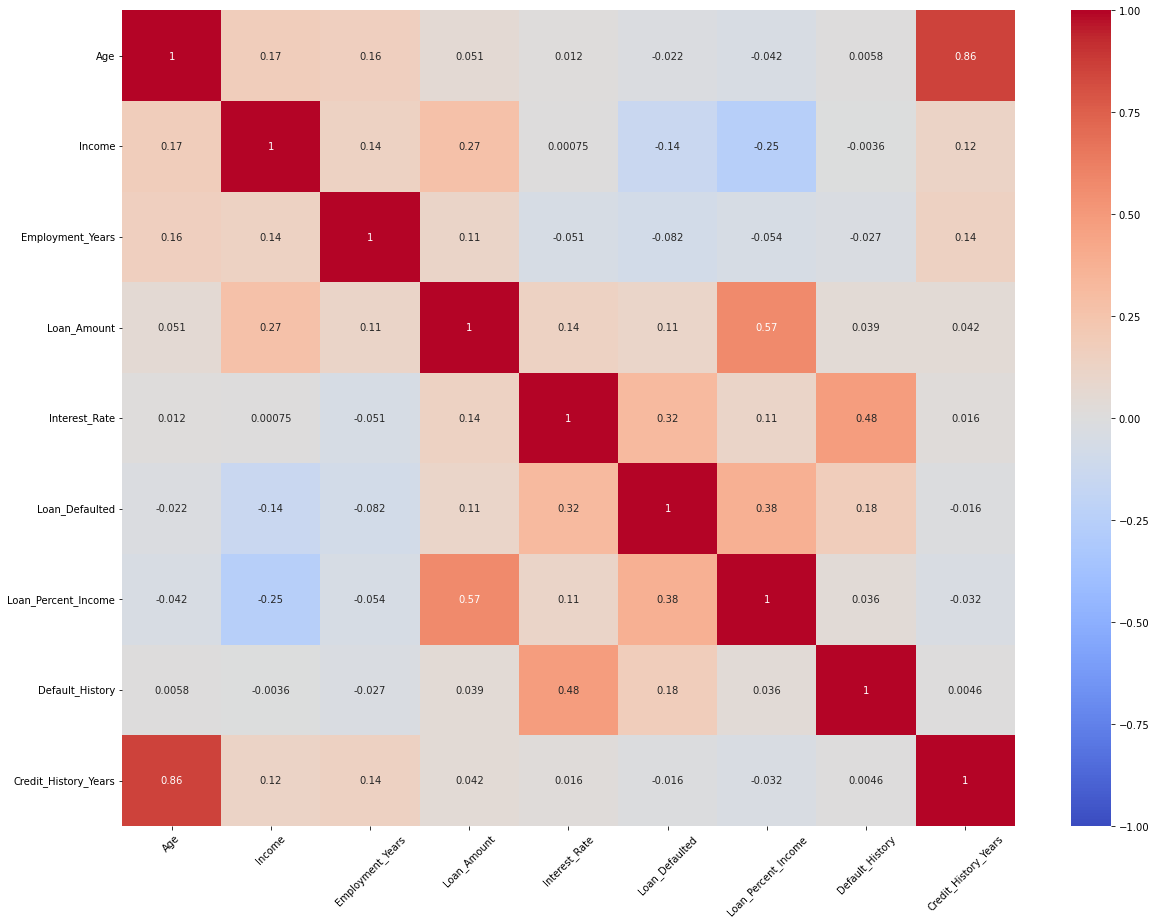

In [11]:
corrdf = df_vis.corr()
top_corr_features = corrdf.index
plt.figure(figsize=(20,15))
df_heatmap = sns.heatmap(df_vis[top_corr_features].corr(),annot=True,cmap="coolwarm", vmin=-1)
df_heatmap.set_xticklabels(df_heatmap.get_xticklabels(),rotation=45)

#### Observation

- The above heatmap shows how each feature correlates with one another

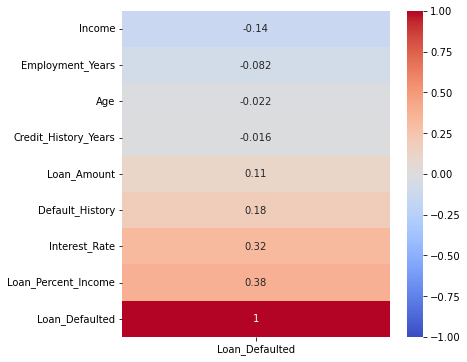

In [12]:
# Plottting another heatmap to have a clearer look 
# at each feature's correlation against loan approval

plt.figure(figsize=(6,6))
sns.heatmap(corrdf[['Loan_Defaulted']].sort_values(by=["Loan_Defaulted"]),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

#### Observation

- This second heatmap shows how each feature correlates to Loan_Approval
- Features colored in orange show slight positive correlation, and features colored in blue show slight negative correlation

### Create a piechart to look at defaulted and non-defaulted distribution

In [13]:
# First, get the total number of approvals and rejections
df_renamed["Loan_Defaulted"].value_counts()

0    25473
1     7108
Name: Loan_Defaulted, dtype: int64

([<matplotlib.patches.Wedge at 0x1d87071ea60>,
 [Text(-0.6962659422296025, 0.8515948201410833, 'Defaulted'),
  Text(0.6962659422296019, -0.8515948201410837, 'Not Defaulted')],
 [Text(-0.37978142303432855, 0.46450626553149993, '21.8%'),
  Text(0.3797814230343283, -0.46450626553150015, '78.2%')])

(-1.105644755975978,
 1.1034331010287588,
 -1.1050035155463112,
 1.1002382626450624)

Text(0.5, 1.0, 'Loan Default Status')

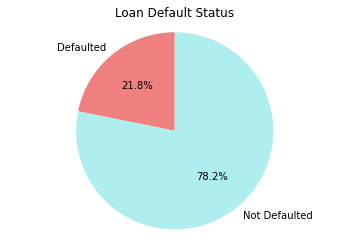

In [14]:
# Feed value counts into piechart
labels = 'Defaulted', 'Not Defaulted'
fracs = [7108, 25473]

fig1, ax1 = plt.subplots()
ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90, colors = ['lightcoral', 'paleturquoise'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Loan Default Status")
plt.show()

#### Observation

- From this chart it is clear that a vast majority of loans are not defaulted
- Previously by just looking at the data, it was difficult to get a sense of the percentage of default. This pie chart shows clearly that a little over 1/5 of loans given out in this data set were defaulted.

### Individual features' correlation to loan approval using bar chart

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Age VS Loan Default Status')

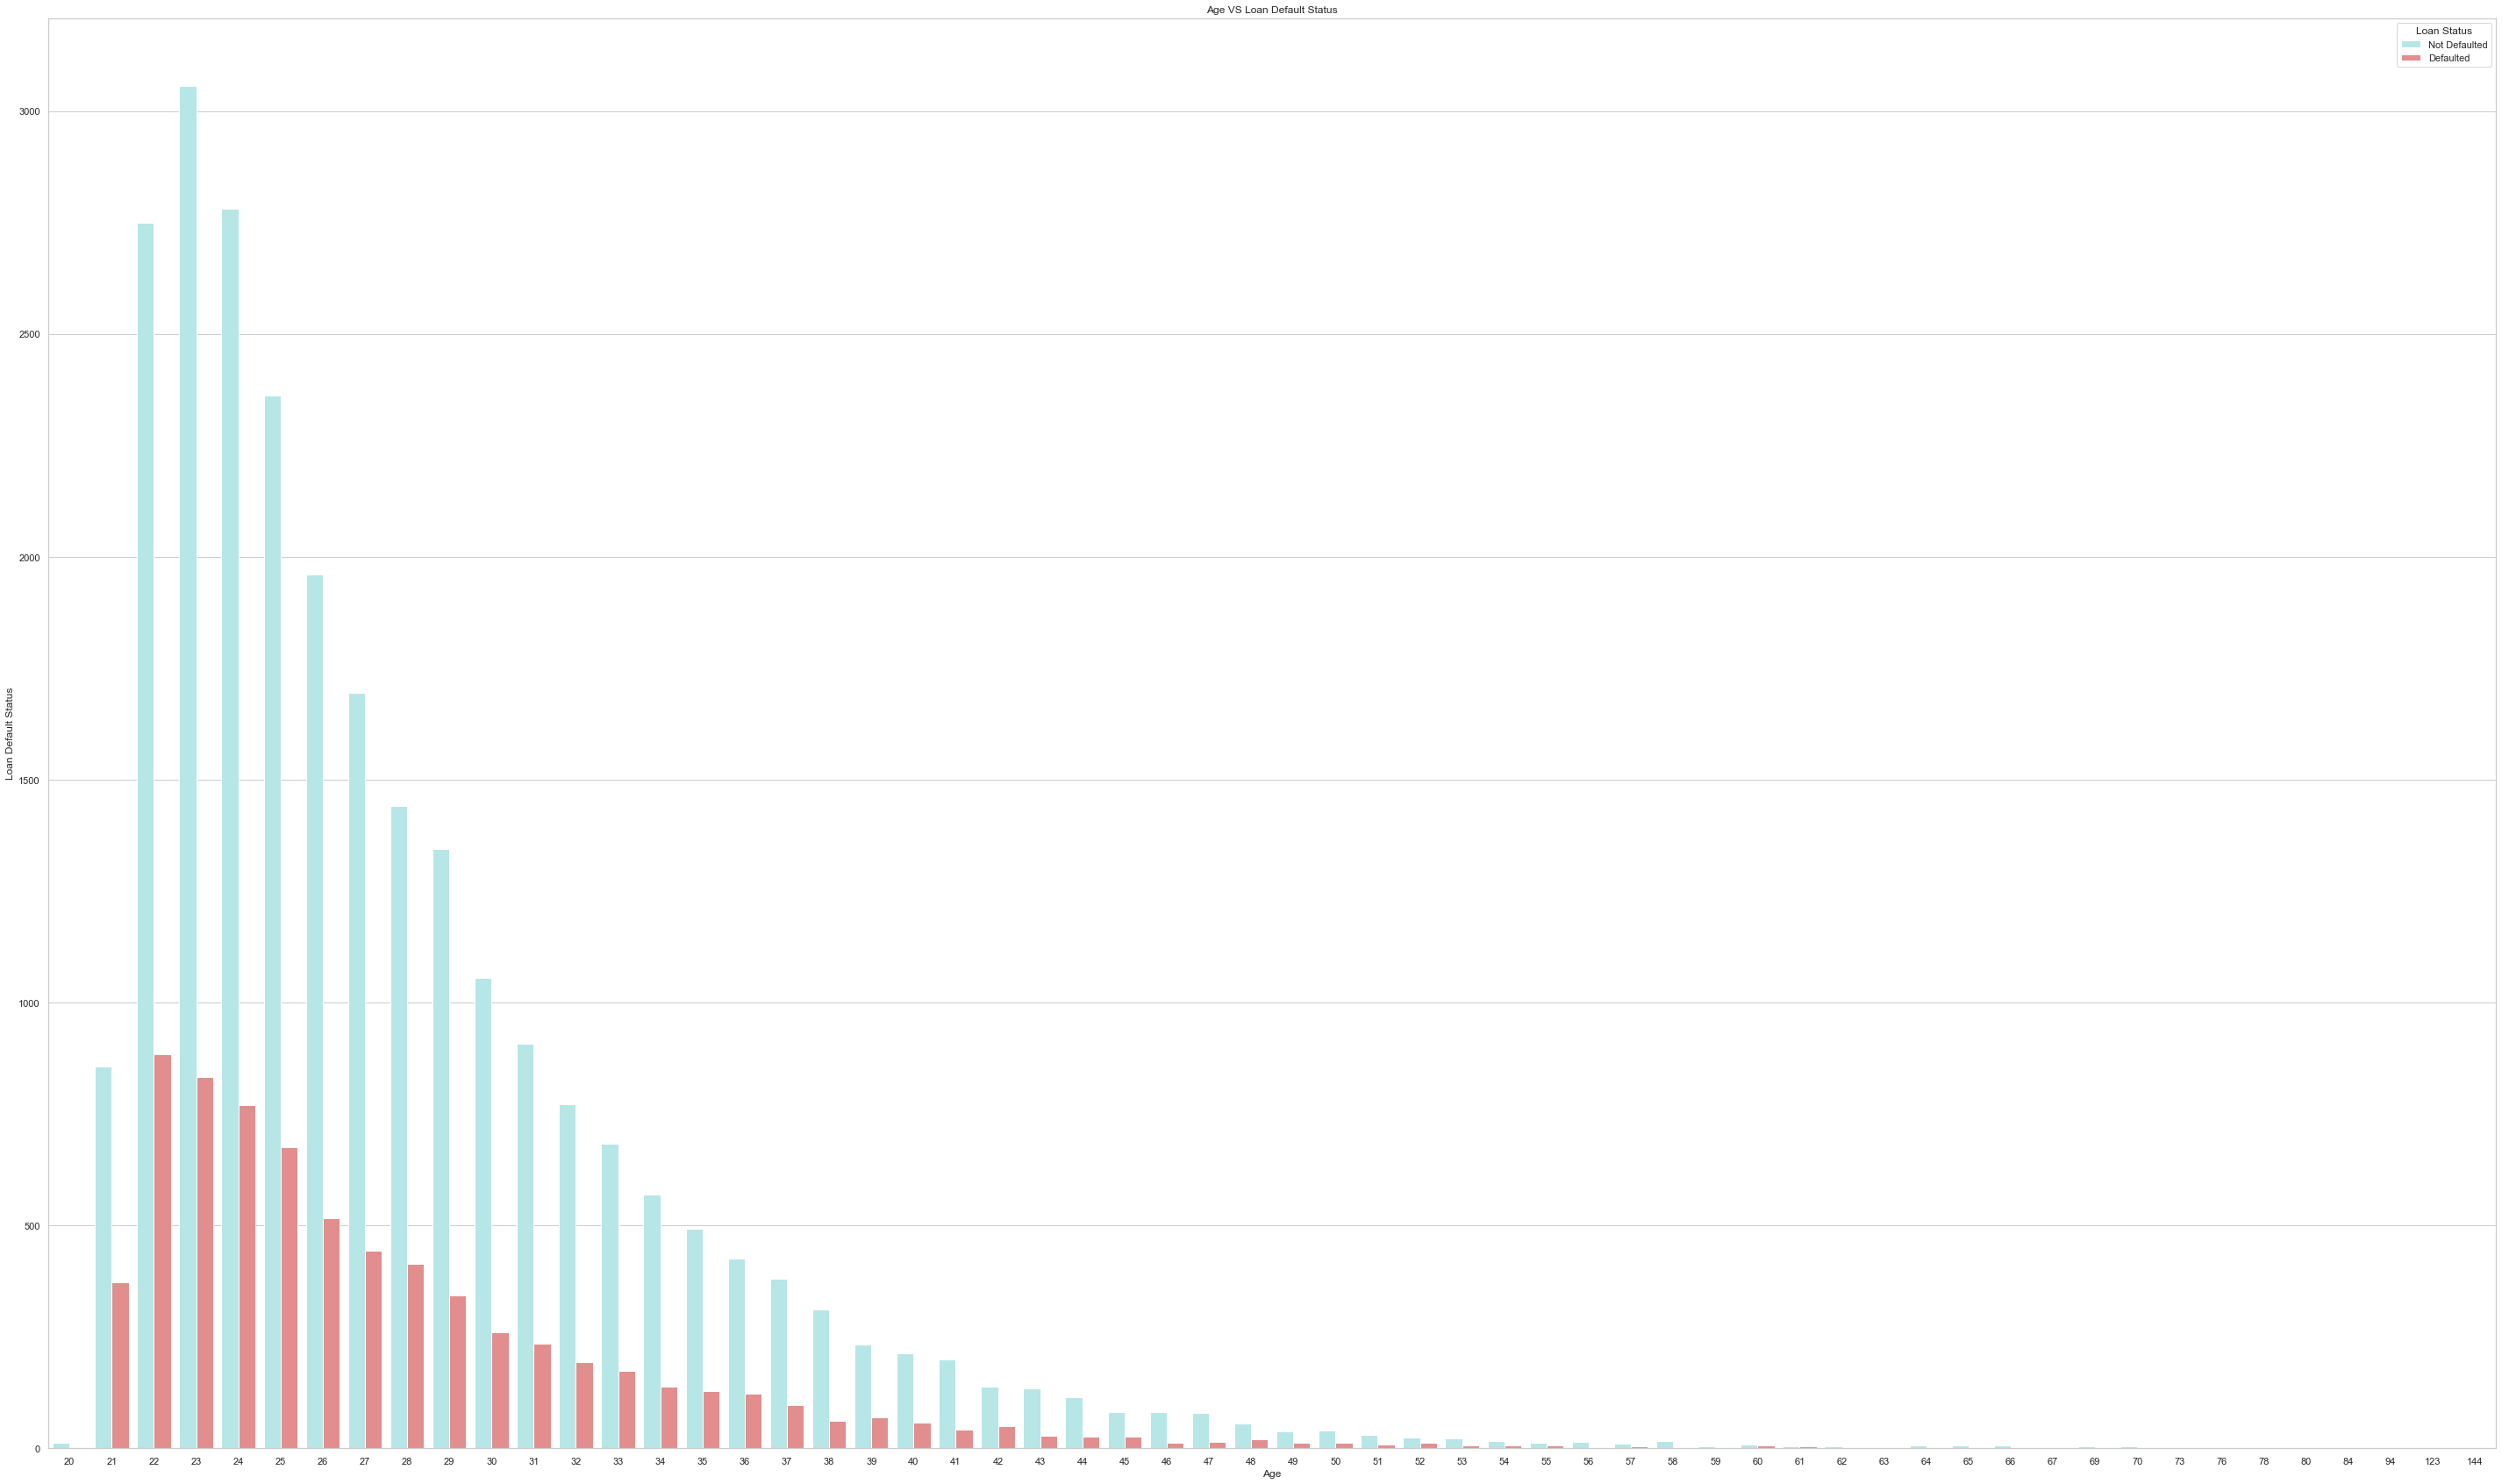

In [15]:
# Age vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(50, 30))
AgePlot = sns.countplot(data=df_cleaned, x="Age", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Age", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Age VS Loan Default Status")
plt.show()

#### Observation

- This Chart shows the number of defaults and non-defaults for each age group
- Although it shows that there is a high number of defaults among the ages of early to mid 20s, it doesn't necessarily show that the younger you are, the higher the default rate
- It just shows that people in their 20s took on a lot more loans compared to people above their 30s and 40s
- According to this chart:
- For age group 21, there were 2.33x more non-defaults than defaults
- For age group 22, there were 3.11x more non-defaults than defaults
- For age group 32, there were 3.5x more non-defaults than defaults
- For age group 42, there were 2.78x more non-defaults than defaults

[Text(0.5, 0, 'Home_Ownership'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Home Ownership VS Loan Default Status')

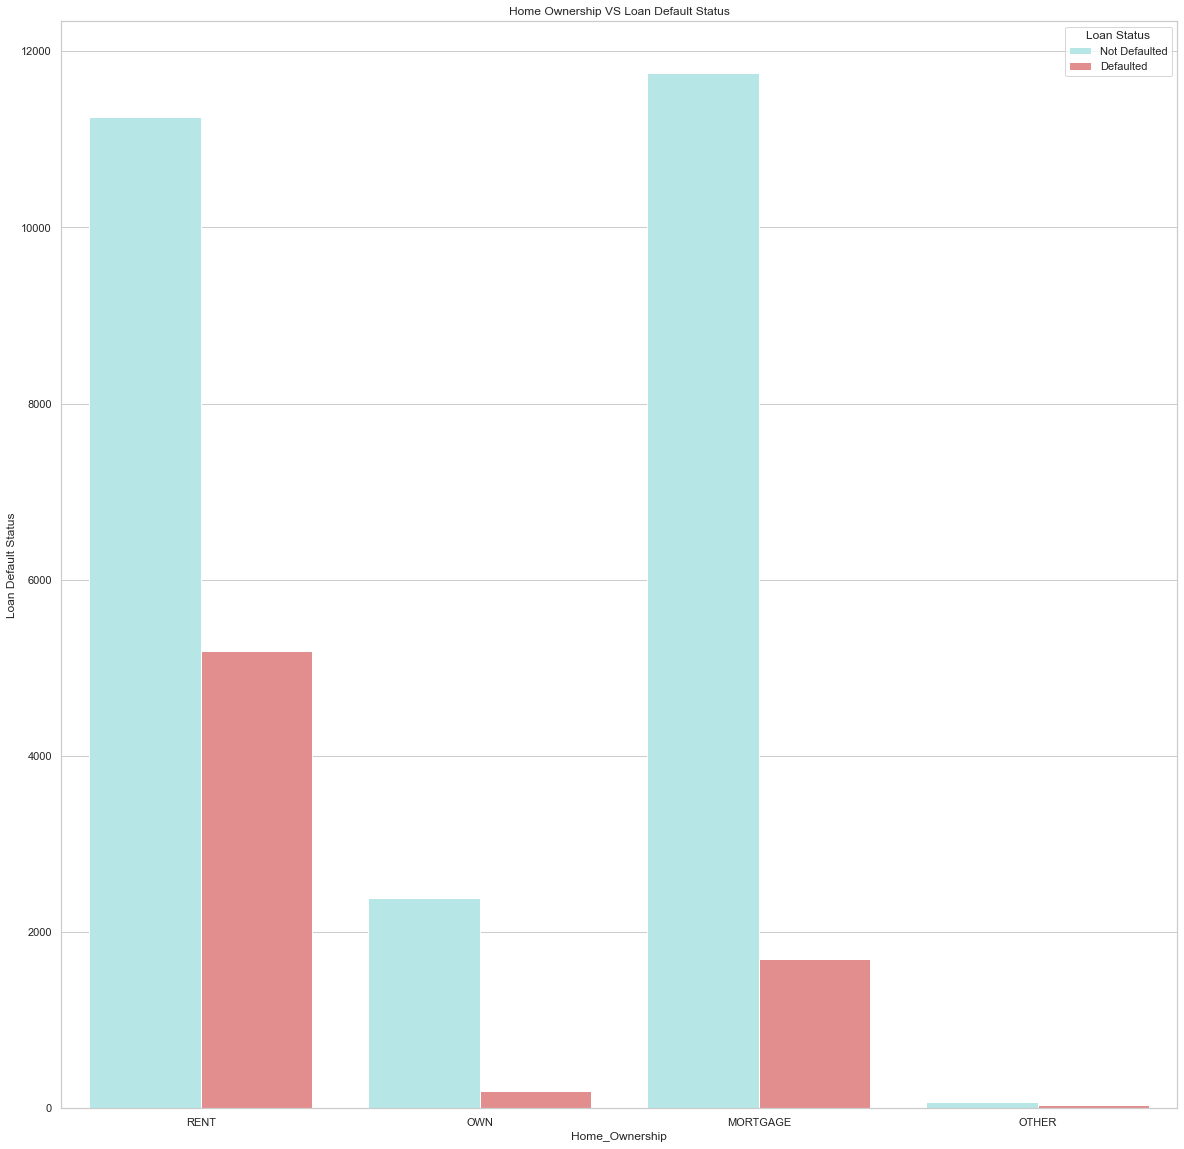

In [16]:
# Home Ownership vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(20, 20))
AgePlot = sns.countplot(data=df_cleaned, x="Home_Ownership", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Home_Ownership", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Home Ownership VS Loan Default Status")
plt.show()

#### Observation

- From this chart, it shows that there indeed could be a correlation between home ownership and loan default rate
- It seems to show that people who own homes or hold a mortgage have noticeably lower default rates than people who rent
- People who rent have a non-default rate that is slighly above 2x of default, whereas the non-default rate for mortgage holders are slightly above 7x, and home home owners somewhere above 14x

[Text(0.5, 0, 'Employment_Years'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Employment Length (Years) VS Loan Default Status')

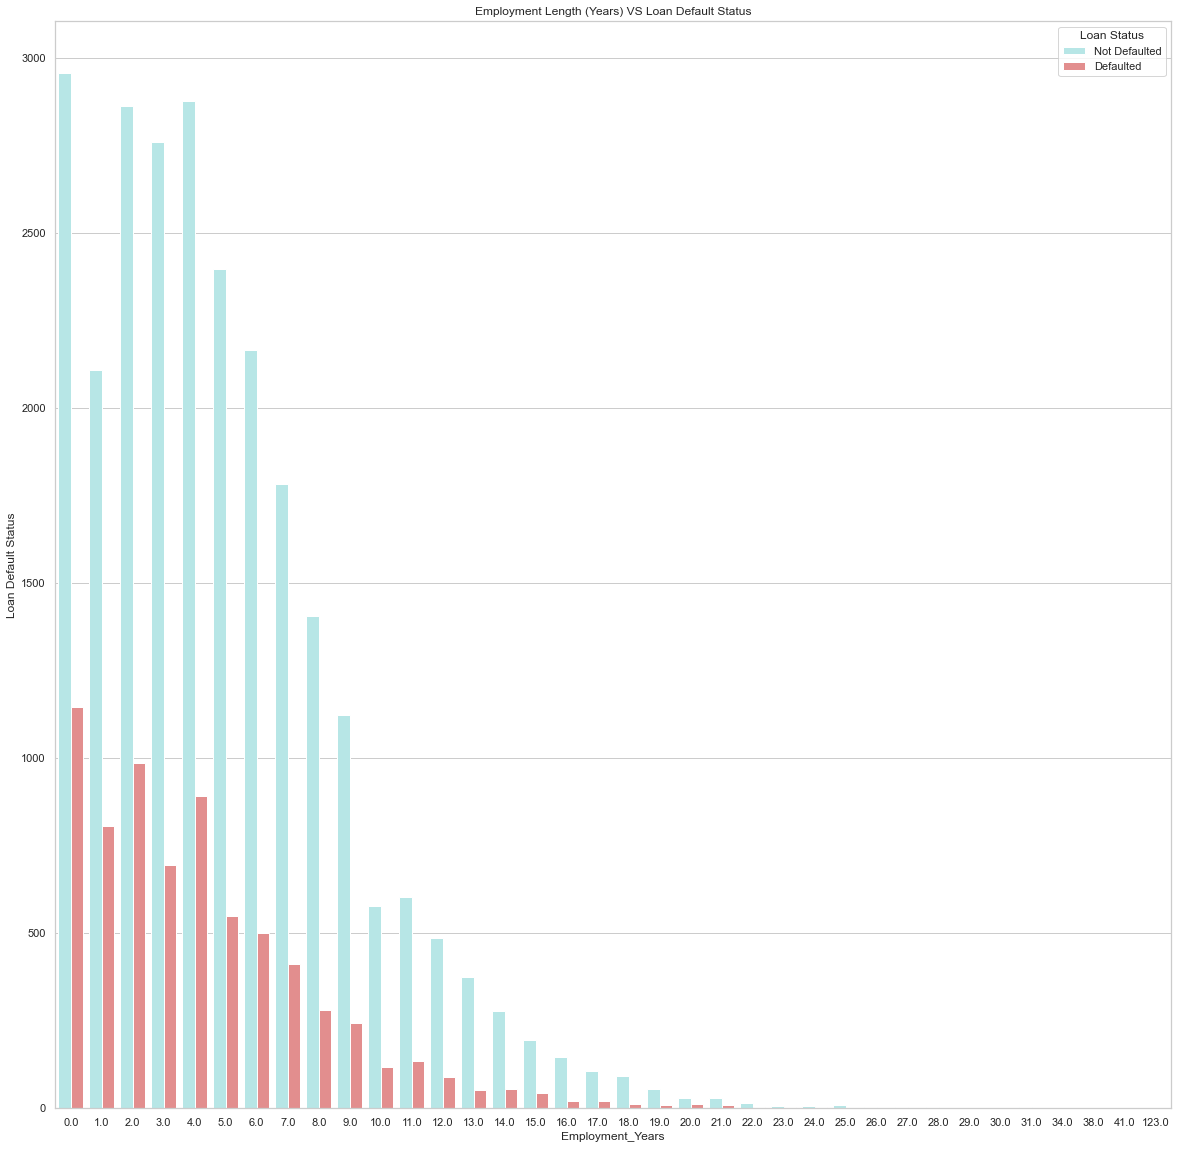

In [17]:
# Employment Duration vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(20, 20))
AgePlot = sns.countplot(data=df_cleaned, x="Employment_Years", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Employment_Years", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Employment Length (Years) VS Loan Default Status")
plt.show()

#### Observation:

- The outcome of this chart is similar to age groups
- Employment years will be combined with age groups in a scatter plot below

[Text(0.5, 0, 'Loan Intention'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Loan Intention VS Loan Default Status')

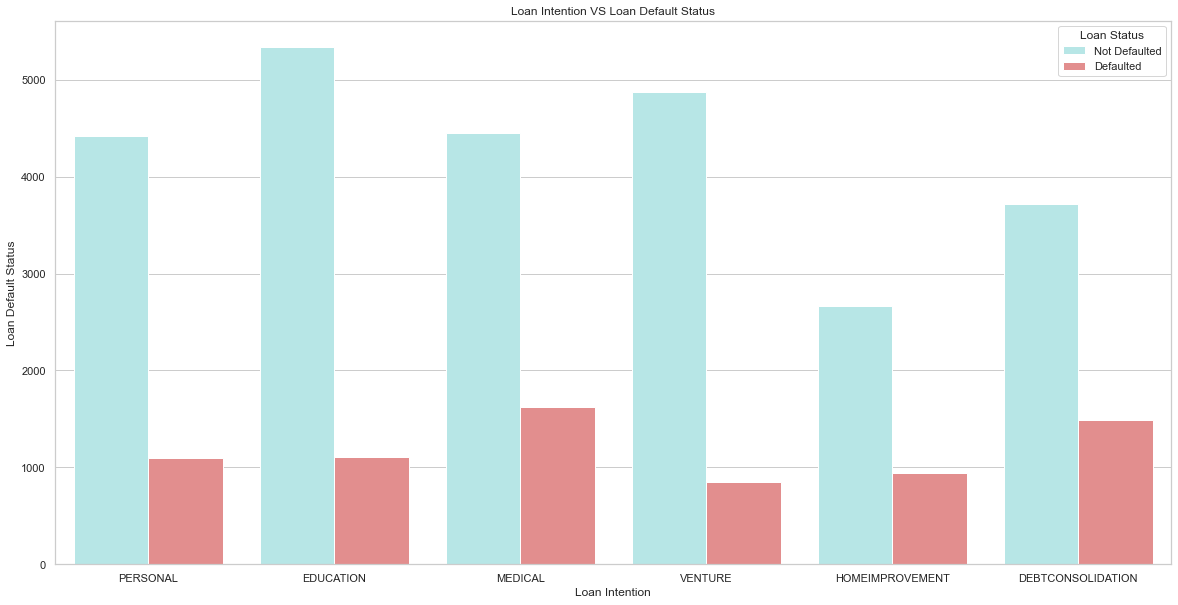

In [18]:
# Loan Intention vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(20, 10))
AgePlot = sns.countplot(data=df_cleaned, x="Loan_Intention", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Loan Intention", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Loan Intention VS Loan Default Status")
plt.show()

[Text(0.5, 0, 'Loan Grade'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Loan Grade VS Loan Default Status')

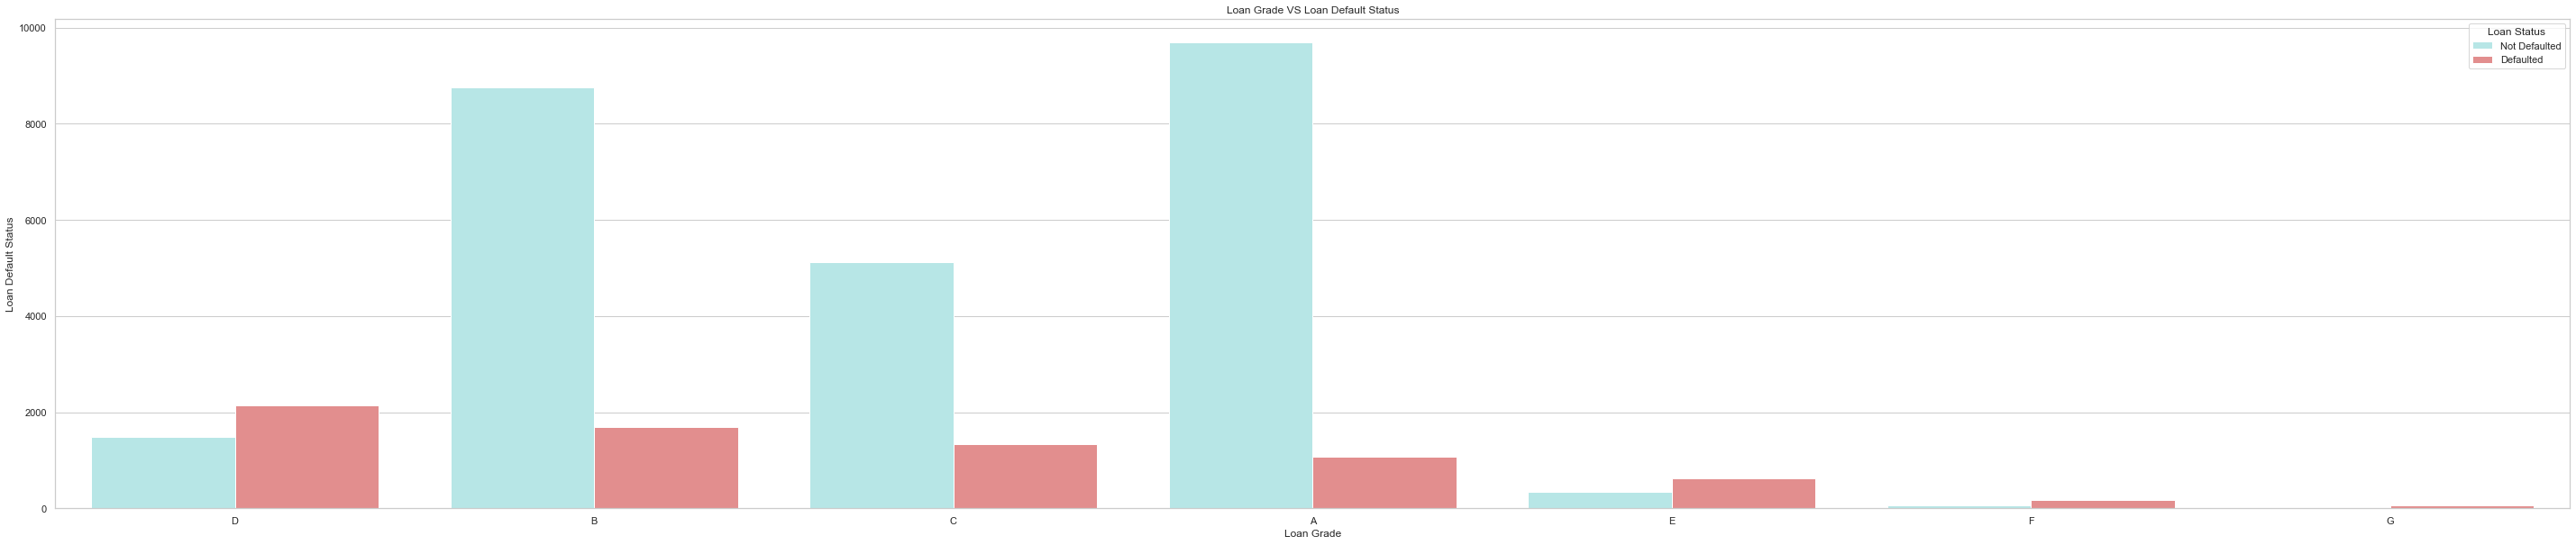

In [19]:
# Loan Grade vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(50, 10))
AgePlot = sns.countplot(data=df_cleaned, x="Loan_Grade", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Loan Grade", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Loan Grade VS Loan Default Status")
plt.show()

#### Observation

- Loan Grade shows possible correlation with Loan Default Rate
- Percentage of default appears to increase as grade increased from A to G
- Defaults appear to be higher than non-defaults from grades D and up

[Text(0.5, 0, 'Loan Default Status'), Text(0, 0.5, 'Loan Percent of Income')]

Text(0.5, 1.0, 'Loan Percent Income VS Loan Default Status')

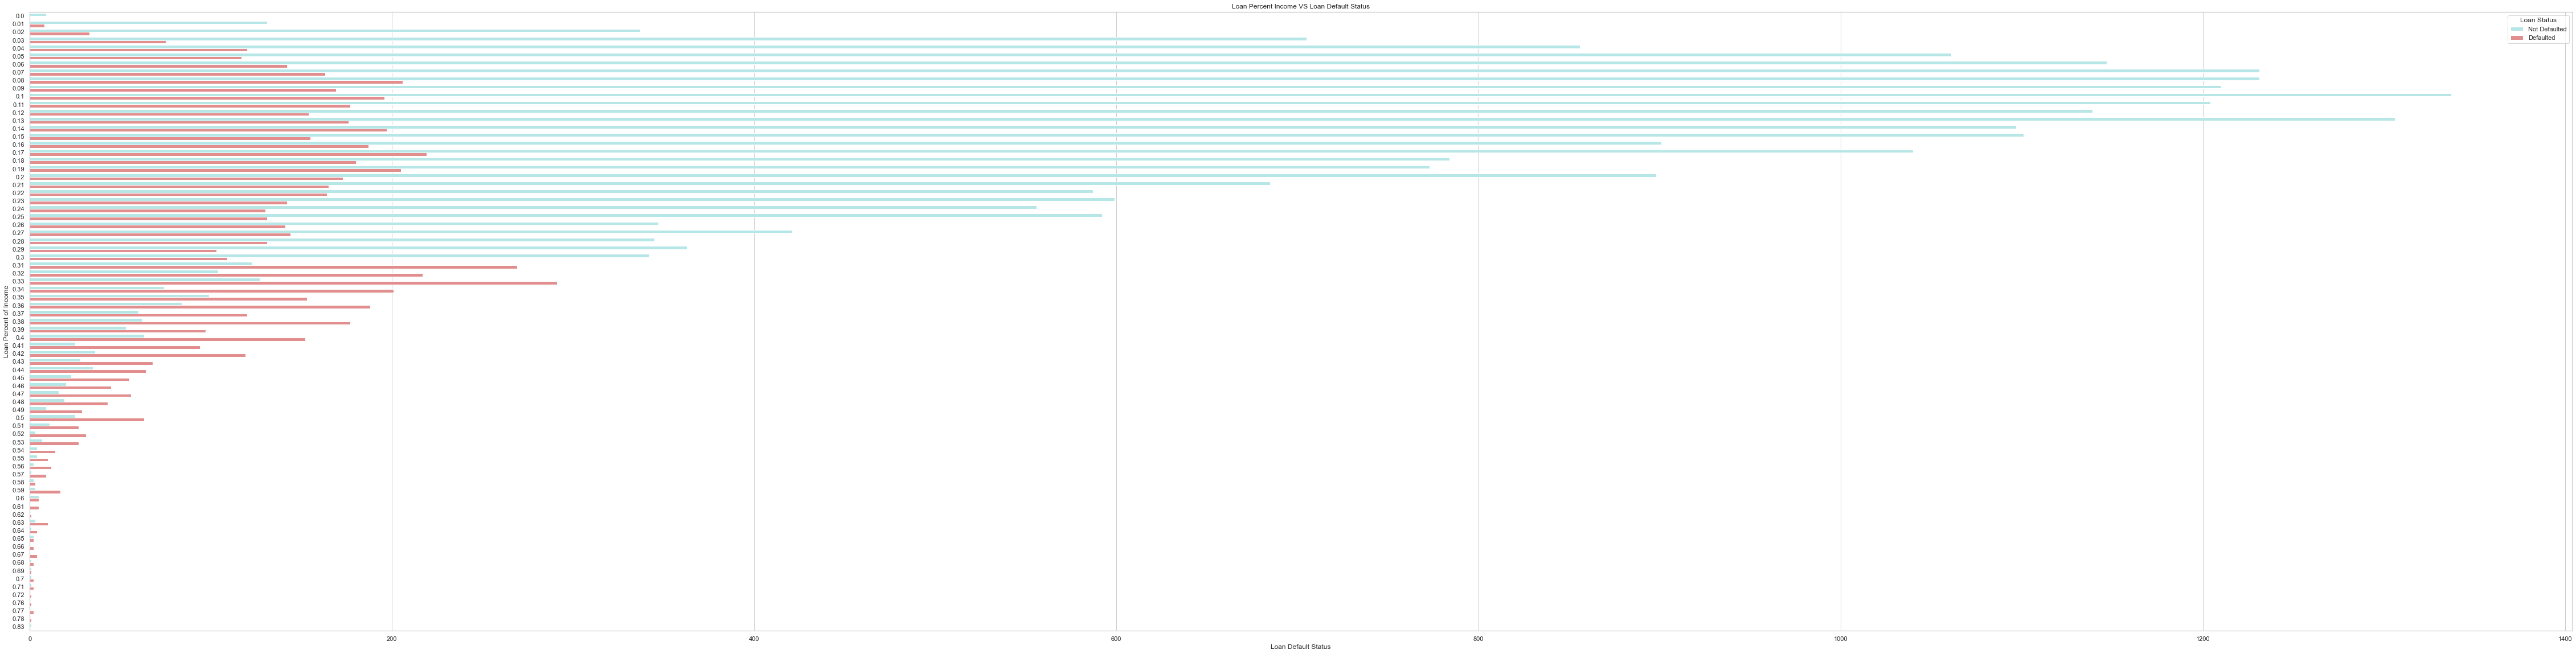

In [20]:
# Loan Percent Income vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(80, 20))
AgePlot = sns.countplot(data=df_cleaned, y="Loan_Percent_Income", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Loan Default Status", ylabel="Loan Percent of Income")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Loan Percent Income VS Loan Default Status")
plt.show()

#### Observation

- Possible correlation between loan percent of income and Loan Default Rate
- There appears to be significantly higher default rates for loan percent income of above 30%

[Text(0.5, 0, 'Default_History'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Presence of Default History VS Loan Default Status')

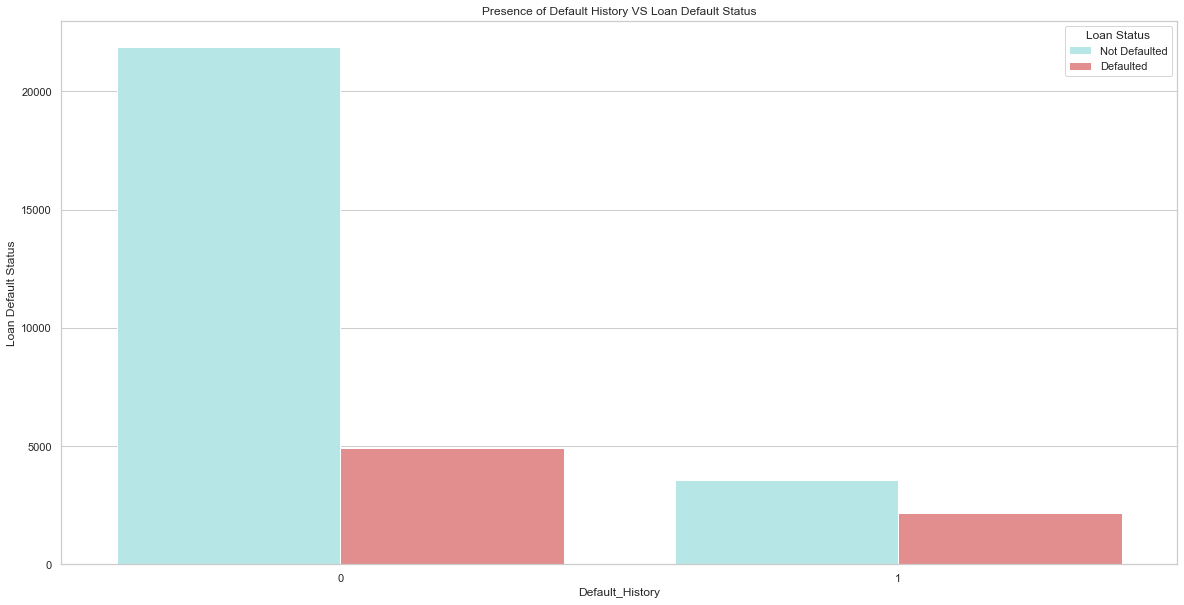

In [21]:
# Default History vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(20, 10))
AgePlot = sns.countplot(data=df_cleaned, x="Default_History", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Default_History", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Presence of Default History VS Loan Default Status")
plt.show()

#### Observation

- It is clear here that the risk of default is significantly higher when client has existing default history

[Text(0.5, 0, 'Credit History Years'), Text(0, 0.5, 'Loan Default Status')]

Text(0.5, 1.0, 'Credit History (Years) VS Loan Default Status')

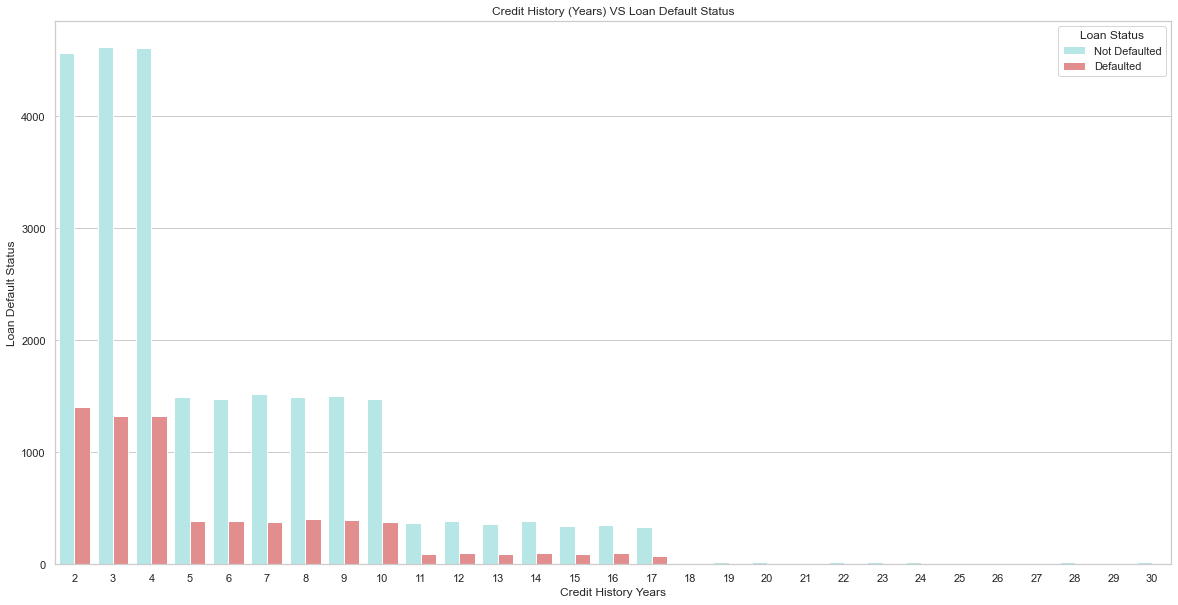

In [22]:
# Credit History (Years) vs Loan Approval
sns.set_theme(style="whitegrid")

fig = plt.subplots(figsize=(20, 10))
AgePlot = sns.countplot(data=df_cleaned, x="Credit_History_Years", hue="Loan_Defaulted", palette=['#AFEEEE','#f08080'])
AgePlot.set(xlabel="Credit History Years", ylabel="Loan Default Status")
plt.legend(title="Loan Status", labels=["Not Defaulted", "Defaulted"], loc="upper right")
plt.title("Credit History (Years) VS Loan Default Status")
plt.show()

### Scatter plots of 2 features combined

<AxesSubplot:xlabel='Employment_Years', ylabel='Age'>

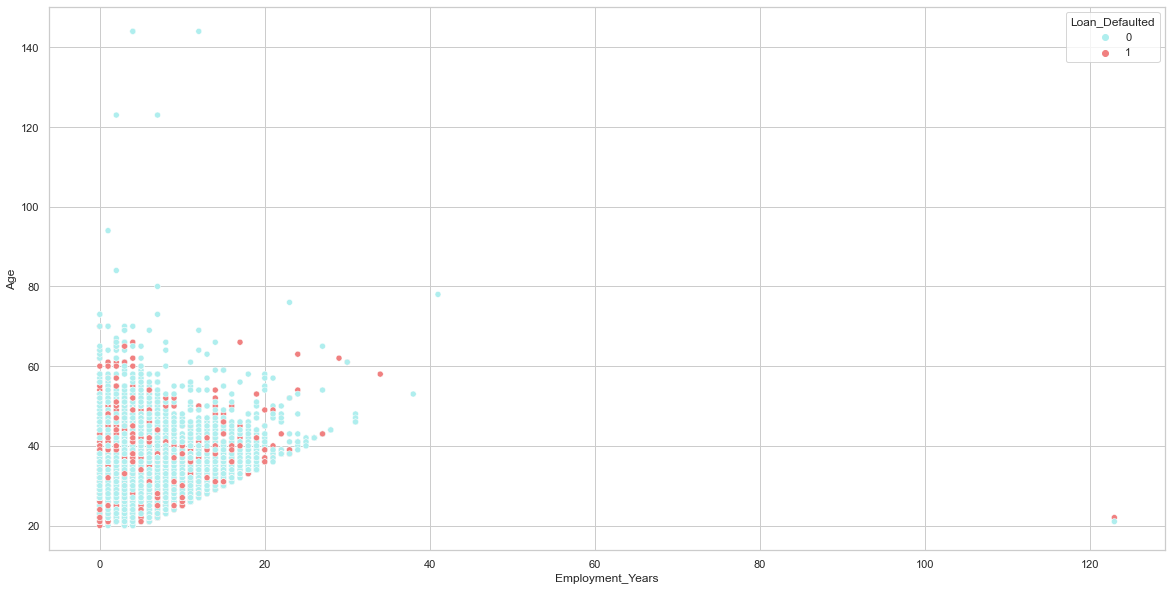

In [23]:
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x = "Employment_Years", y = "Age", data = df_cleaned, hue = "Loan_Defaulted", palette=['#AFEEEE','#f08080'])
plt.show()

<AxesSubplot:xlabel='Credit_History_Years', ylabel='Age'>

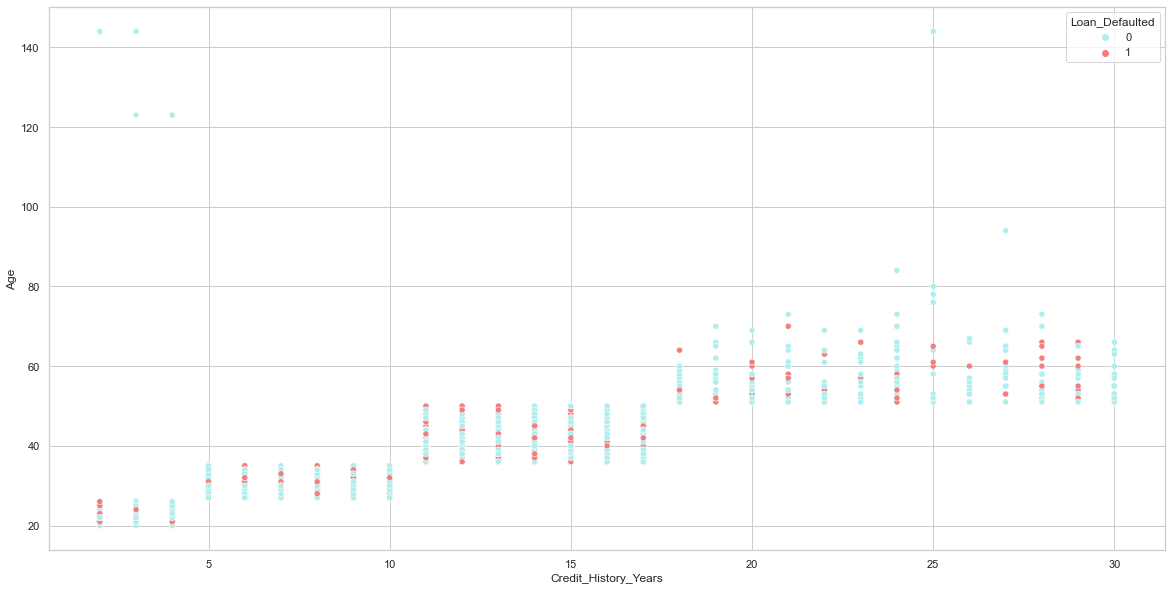

In [24]:
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x = "Credit_History_Years", y = "Age", data = df_cleaned, hue = "Loan_Defaulted", palette=['#AFEEEE','#f08080'])
plt.show()

<AxesSubplot:xlabel='Loan_Grade', ylabel='Interest_Rate'>

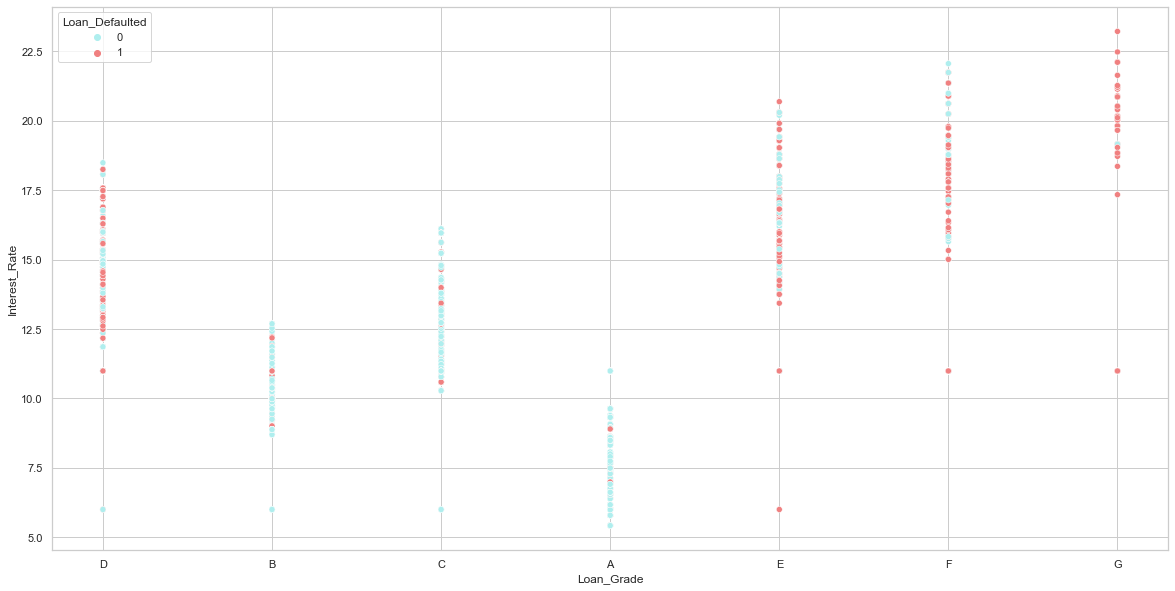

In [25]:
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x = "Loan_Grade", y = "Interest_Rate", data = df_cleaned, hue = "Loan_Defaulted", palette=['#AFEEEE','#f08080'], size_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

<AxesSubplot:xlabel='Loan_Amount', ylabel='Interest_Rate'>

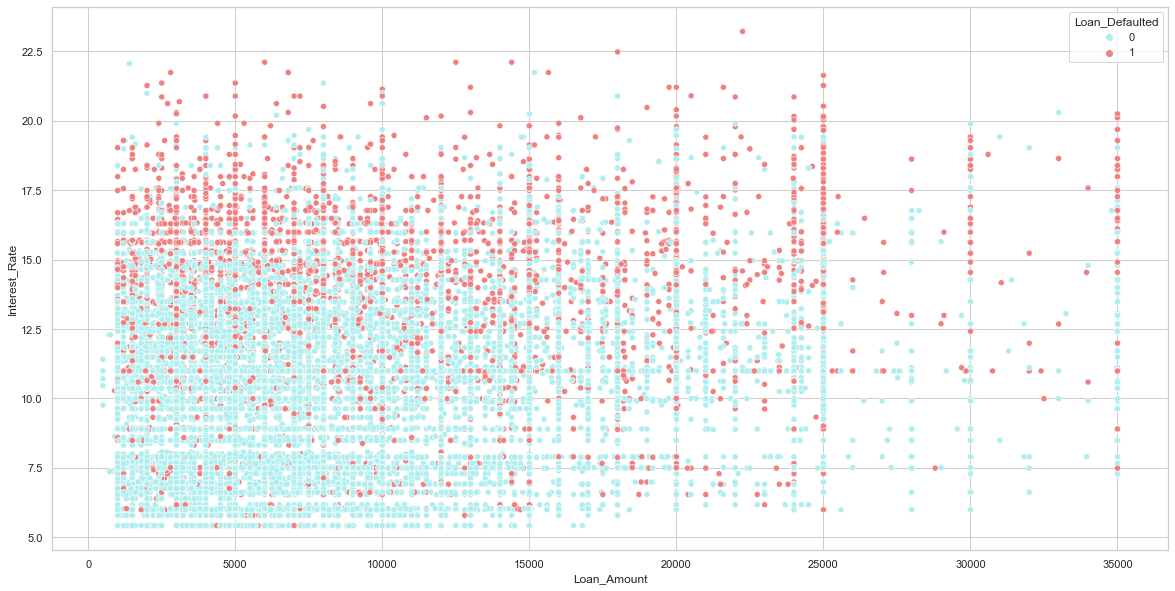

In [26]:
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x = "Loan_Amount", y = "Interest_Rate", data = df_cleaned, hue = "Loan_Defaulted", palette=['#AFEEEE','#f08080'])
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Loan_Percent_Income'>

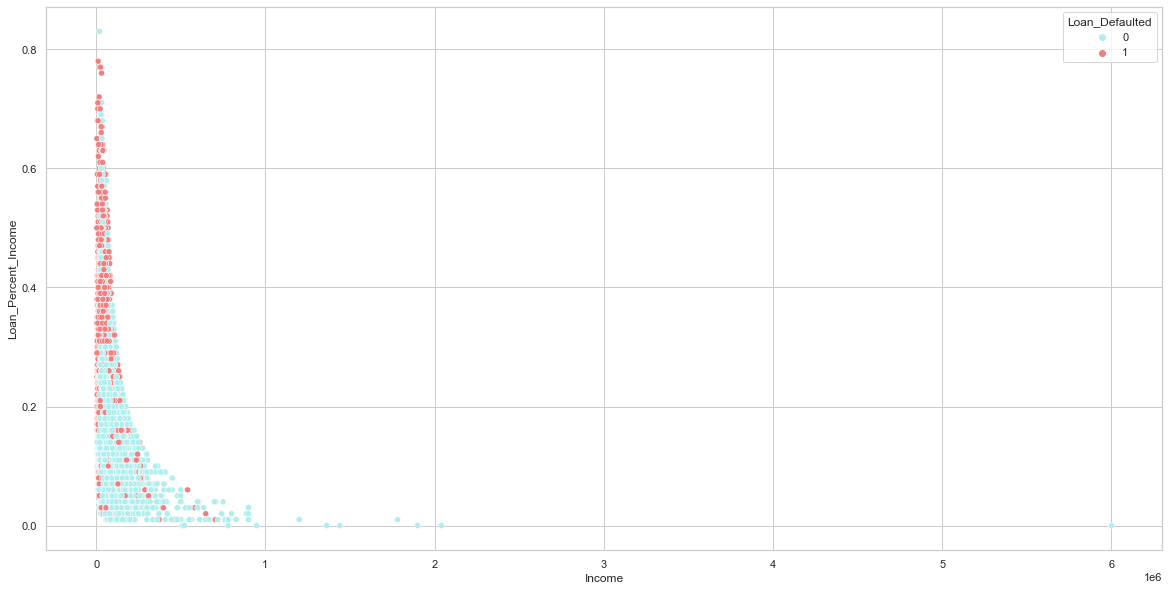

In [27]:
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(x = "Income", y = "Loan_Percent_Income", data = df_cleaned, hue = "Loan_Defaulted", palette=['#AFEEEE','#f08080'])
plt.show()

#### Observation

- It is clear that higher interest rates and higher loan percent income led to more loan defaults

### EDA Conclusion

- It is clear that some features influence loan default status more than others
- But they all seem to play a role in determining whether the load is defaulted
- Thus, all features will be fed into the machine learning model

# 4. Machine Learning Modelling

### Copy dataframe to new training variable

In [28]:
df_train = df_cleaned.copy()
df_train

,Age,Income,Home_Ownership,Employment_Years,Loan_Intention,Loan_Grade,Loan_Amount,Interest_Rate,Loan_Defaulted,Loan_Percent_Income,Default_History,Credit_History_Years
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


### Converting object data types to numeric values

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_train:
    if df_train[col].dtypes=='object':
        df_train[col]=le.fit_transform(df_train[col])

In [30]:
y = df_train.pop("Loan_Defaulted") #pop out last column
X = df_train #columns except for "Approval_Status" will be input

### Importing K-Nearest Neighbors Model

In [31]:
#import all libraries for KNN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

0.8781647997544882
0.8843025932177382
0.8861439312567132
0.8904403866809882
0.8898266073346632
0.8884456038054319
0.8879852692956882
0.8882921589688507
0.885990486420132
0.8856835967469695


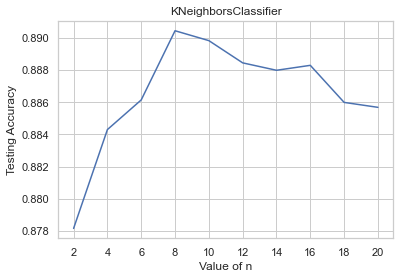

In [32]:
#split X and y into training and testing sets. train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

#scaling the features as we have observed from charts above, the spread of the features are extreme.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

scores = []

for n in range(2, 20+1,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    _ = knn.fit(scaled_X_train, y_train)
    y_pred_class = knn.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, y_pred_class))
    print(accuracy_score(y_test, y_pred_class))
    
_ = plt.plot(scores)
_ = plt.xticks(ticks=range(10), labels=range(2,20+1,2))
_ = plt.title("KNeighborsClassifier")
_ = plt.xlabel('Value of n')
_ = plt.ylabel('Testing Accuracy')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


864 labels are identified as True Positive out of 6517 test labels.
4908 labels are identified as True Negative out of 6517 test labels.


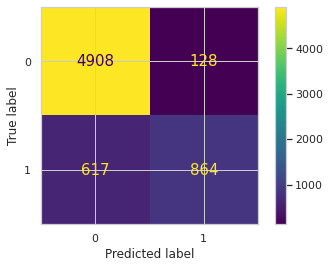

In [33]:
#looking at the realiability of KNeighborsClassifier model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)  # default confusion matrix text size is too small. 

cm = confusion_matrix(y_test, y_pred_class) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

TP = cm[1,1]
TN = cm[0,0]

#TP_percent = TP/testing_size * 100
#TN_percent = TN/testing_size * 100
#"%.0f%%" % (TP_percent)
#"%.0f%%" % (TN_percent)

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

### KNeighborsClassifer Summary
- Training size 80%, testing size 20%
- n = 8 (best value of n) yield a prediction accuracy of 89.04%
- 5772 labels out of 6517 labels correctly classified, 88.57% for n = 20

### Importing Logistic Regression Model

In [34]:
#import libraries for logreg
from sklearn.linear_model import LogisticRegression

In [35]:
#initialize LogisticRegression
logreg = LogisticRegression()

#still using the same train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

#scaling the features as we have observed from charts above, the spread of the features are extreme.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

logreg.fit(scaled_X_train, y_train)

y_pred = logreg.predict(scaled_X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))

LogisticRegression()

Accuracy: 0.8424121528310572


761 labels are identified as True Positive out of 6517 test labels.
4729 labels are identified as True Negative out of 6517 test labels.


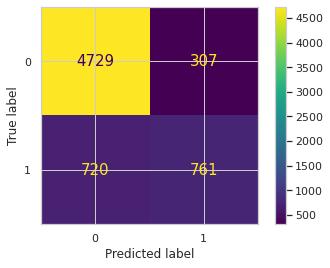

In [36]:
#looking at the realiability of LogisticRegression model
font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)  # default confusion matrix text size is too small. 

cm = confusion_matrix(y_test, y_pred) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

TP = cm[1,1]
TN = cm[0,0]

#TP_percent = TP/testing_size * 100
#TN_percent = TN/testing_size * 100
#"%.0f%%" % (TP_percent)
#"%.0f%%" % (TN_percent)

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

### LogisticRegression Summary
- Training size 80%, testing size 20%
- Yields a prediction accuracy of 84.24%
- 8490 labels out of 6517 labels correctly classified = 84.24%
- Lower prediction as compared to KNeighborsClassifier model

### Importing Decision Tree Classifier Model

In [37]:
#import libraries for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
# initialize LogisticRegression

dt = DecisionTreeClassifier()

#still using the same train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

#scaling the features as we have observed from charts above, the spread of the features are extreme.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

dt.fit(scaled_X_train,y_train)

y_preds = dt.predict(scaled_X_test)

accuracy_score(y_test,y_preds)

DecisionTreeClassifier()

0.844713825379776

973 labels are identified as True Positive out of 6517 test labels.
4532 labels are identified as True Negative out of 6517 test labels.


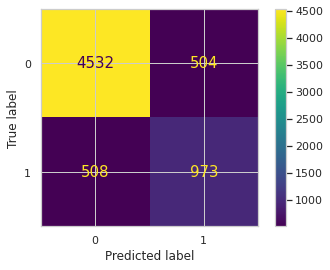

In [39]:
#looking at the realiability of DecisionTreeClassifer model
font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)  # default confusion matrix text size is too small. 

cm = confusion_matrix(y_test, y_preds) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

TP = cm[1,1]
TN = cm[0,0]

#TP_percent = TP/testing_size * 100
#TN_percent = TN/testing_size * 100
#"%.0f%%" % (TP_percent)
#"%.0f%%" % (TN_percent)

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

### DecisionTreeClassifier Summary
- Training size 80%, testing size 20%
- Yields a prediction accuracy of 84.59%
- 5513 labels out of 6517 labels correctly classified = 84.59%
- Slightly higher accuracy as compared to LogisticRegression's 84.24%, but lower than KNeighborsClassifer's 89.04%

In [40]:
# look at the available hyperparameters for the KNeighborsClassifier
print(knn.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [41]:
# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors': [6, 8, 10], #using best n values from initial run
    'weights': ('uniform', 'distance'),
    'metric': ("minkowski","manhattan"),
    'leaf_size': [3,5,7],
    'algorithm': ('ball_tree','auto'),
    'p': [1,4,7]
}

### Importing GridSearchCV

In [42]:
#import libraries for GridSearchCV and parameters display
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [43]:
#still using the same train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

#scaling the features as we have observed from charts above, the spread of the features are extreme.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Intialize KNN 
knn = KNeighborsClassifier()

# Intialize GridSearchCV
clf = GridSearchCV(knn, search_parameters, verbose = 1)

# Fit our training data
clf.fit(scaled_X_train,y_train)

print("Best Estimator:", clf.best_estimator_.n_neighbors)
print("Best params:", clf.best_params_)
print("Best Score:", clf.best_score_)

# Make predictions using the new model.
best_test_predictions = clf.predict(scaled_X_test)

# Get the accuracy score
accuracy_score(y_test,best_test_predictions)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'auto'),
                         'leaf_size': [3, 5, 7],
                         'metric': ('minkowski', 'manhattan'),
                         'n_neighbors': [6, 8, 10], 'p': [1, 4, 7],
                         'weights': ('uniform', 'distance')},
             verbose=1)

Best Estimator: 10
Best params: {'algorithm': 'ball_tree', 'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score: 0.8972143479779799


0.8948902869418444

947 labels are identified as True Positive out of 6517 test labels.
4885 labels are identified as True Negative out of 6517 test labels.


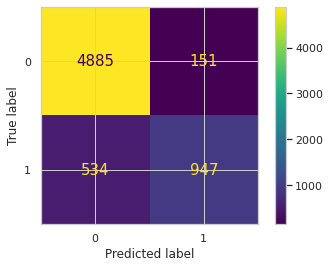

In [44]:
font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)  # default confusion matrix text size is too small. 

cm = confusion_matrix(y_test, best_test_predictions) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

TP = cm[1,1]
TN = cm[0,0]

#TP_percent = TP/testing_size * 100
#TN_percent = TN/testing_size * 100
#"%.0f%%" % (TP_percent)
#"%.0f%%" % (TN_percent)

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

### GridSearchCV Summary

- GridSearchCV found that for the KNeighborsClassifer model, having 10 nearest neighbors produced a more accurate prediction of 89.49% as compared to 8 nearest neighbors' 89.04%

# 5. Project Summary

#### Data Preparation

- Data was first prepared for analysis by standardizing column names, filling in missing values, and converting categorical data to 1s and 0s

#### Exploratory Data Analysis

- EDA was performed on the dataset to identify positive/negative/non-correlated features, as well as to get an overall understanding of the data using heatmaps, pie chart, bar charts, and scatter plots

#### Machine Learning Modelling

- Dataset was split 80% as training data and 20% as test data
- KNeighborsClassifer, LogisticRegression, DecisionTreeClassifier machine learning models were used
- KNeighborsClassifer gave the most accurate result of 89.04% with n = 8
- DecisionTreeClassifier was the second most accurate at 84.59%
- LogisticRegression was the least accurate at 84.24%

#### Hyper-parameter Tuning Using GridSearchCV

- Using GridSearchCV, the KNeighborsClassifer model was further improved from 89.04% accuracy to 89.49% accuracy

#### Limitations

- Dataset could include more negatively correlated features, as this data set seems to be overweight on positively correlation
- More time could be spend on adjusting each model's hyperparameter to find the highest accuracy of each model, since GridSearchCV's run time is qutie significant